<a href="https://colab.research.google.com/github/Udhay2898/Weather/blob/Master/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
df = pd.read_csv('/content/drive/MyDrive/Data Sets/Seattle_Weather_1948-2017(1).csv')
df.head()

,DATE,YEAR,MONTH,DAY,SEASON,PRCP,TMAX,TMIN,CLIMATE,DIFF TEMP,AVE TEMP,PRCP TYPE,WEEK NO,WEEK END
0,01-01-1948,1948,January,Thursday,Winter,0.47,51,42,RAIN,9,46.5,Heavy,1,No
1,02-01-1948,1948,January,Friday,Winter,0.59,45,36,RAIN,9,40.5,Heavy,1,No
2,03-01-1948,1948,January,Saturday,Winter,0.42,45,35,RAIN,10,40.0,Heavy,1,Yes
3,04-01-1948,1948,January,Sunday,Winter,0.31,45,34,RAIN,11,39.5,Heavy,1,Yes
4,05-01-1948,1948,January,Monday,Winter,0.17,45,32,RAIN,13,38.5,Moderate,2,No


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       25551 non-null  object 
 1   YEAR       25551 non-null  int64  
 2   MONTH      25551 non-null  object 
 3   DAY        25551 non-null  object 
 4   SEASON     25551 non-null  object 
 5   PRCP       25548 non-null  float64
 6   TMAX       25551 non-null  int64  
 7   TMIN       25551 non-null  int64  
 8   CLIMATE    25548 non-null  object 
 9   DIFF TEMP  25551 non-null  int64  
 10  AVE TEMP   25551 non-null  float64
 11  PRCP TYPE  10903 non-null  object 
 12  WEEK NO    25551 non-null  int64  
 13  WEEK END   25551 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 2.7+ MB


In [18]:
# Convert DATE column to datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y')

In [19]:
df.dtypes

DATE         datetime64[ns]
YEAR                  int64
MONTH                object
DAY                  object
SEASON               object
PRCP                float64
TMAX                  int64
TMIN                  int64
CLIMATE              object
DIFF TEMP             int64
AVE TEMP            float64
PRCP TYPE            object
WEEK NO               int64
WEEK END             object
dtype: object

In [20]:
df.columns

Index(['DATE', 'YEAR', 'MONTH', 'DAY', 'SEASON', 'PRCP', 'TMAX', 'TMIN',
       'CLIMATE', 'DIFF TEMP', 'AVE TEMP', 'PRCP TYPE', 'WEEK NO', 'WEEK END'],
      dtype='object')

In [21]:
df.describe()

,DATE,YEAR,PRCP,TMAX,TMIN,DIFF TEMP,AVE TEMP,WEEK NO
count,25551,25551.000000,25548.000000,25551.000000,25551.000000,25551.000000,25551.000000,25551.000000
mean,1982-12-23 00:00:00,1982.476694,0.106222,59.544206,44.514226,15.029979,52.029216,27.015890
min,1948-01-01 00:00:00,1948.000000,0.000000,4.000000,0.000000,-35.000000,10.000000,1.000000
25%,1965-06-27 12:00:00,1965.000000,0.000000,50.000000,38.000000,10.000000,44.500000,14.000000
50%,1982-12-23 00:00:00,1982.000000,0.000000,58.000000,45.000000,14.000000,51.500000,27.000000
75%,2000-06-18 12:00:00,2000.000000,0.100000,69.000000,52.000000,19.000000,60.500000,40.000000
max,2017-12-14 00:00:00,2017.000000,5.020000,103.000000,71.000000,42.000000,87.000000,54.000000
std,NaN,20.193095,0.239031,12.772984,8.892836,6.834089,10.461340,15.059628


In [22]:
df.isnull().any()

DATE         False
YEAR         False
MONTH        False
DAY          False
SEASON       False
PRCP          True
TMAX         False
TMIN         False
CLIMATE       True
DIFF TEMP    False
AVE TEMP     False
PRCP TYPE     True
WEEK NO      False
WEEK END     False
dtype: bool

In [23]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
25546    False
25547    False
25548    False
25549    False
25550    False
Length: 25551, dtype: bool

In [24]:
df.duplicated() == 1

0        False
1        False
2        False
3        False
4        False
         ...  
25546    False
25547    False
25548    False
25549    False
25550    False
Length: 25551, dtype: bool

In [25]:
df.duplicated().sum()

0

In [26]:
df.nunique()

DATE         25551
YEAR            70
MONTH           12
DAY              7
SEASON           6
PRCP           207
TMAX            87
TMIN            68
CLIMATE          2
DIFF TEMP       42
AVE TEMP       143
PRCP TYPE        3
WEEK NO         54
WEEK END         2
dtype: int64

In [118]:
df = df.fillna('No Event')

In [119]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}:\n {unique_values}\n")

DATE:
 <DatetimeArray>
['2008-01-01 00:00:00', '2008-01-02 00:00:00', '2008-01-03 00:00:00',
 '2008-01-04 00:00:00', '2008-01-05 00:00:00', '2008-01-06 00:00:00',
 '2008-01-07 00:00:00', '2008-01-08 00:00:00', '2008-01-09 00:00:00',
 '2008-01-10 00:00:00',
 ...
 '2017-12-05 00:00:00', '2017-12-06 00:00:00', '2017-12-07 00:00:00',
 '2017-12-08 00:00:00', '2017-12-09 00:00:00', '2017-12-10 00:00:00',
 '2017-12-11 00:00:00', '2017-12-12 00:00:00', '2017-12-13 00:00:00',
 '2017-12-14 00:00:00']
Length: 3636, dtype: datetime64[ns]

YEAR:
 [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]

MONTH:
 ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']

DAY:
 ['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday']

SEASON:
 ['Winter' 'Spring' 'Summer' 'Monsoon' 'Autumn' 'Pre-winter']

PRCP:
 [0.   0.4  0.19 0.03 0.14 0.02 0.57 0.27 0.62 0.16 0.33 0.15 0.07 0.35
 0.08 0.11 0.29 0.17 0.04 0.34 0.06 0.32 0.01 0.31 0.44 

In [150]:
# Filter DataFrame for years greater than or equal to 2008
df = df[df['YEAR'] >= 2015]

df.sample(3)

,DATE,YEAR,MONTH,DAY,SEASON,PRCP,TMAX,TMIN,CLIMATE,DIFF TEMP,AVE TEMP,PRCP TYPE,WEEK NO,WEEK END
24832,2015-12-27,2015,December,Sunday,Pre-winter,0.34,40,35,RAIN,5,37.5,Heavy,52,Yes
24571,2015-04-10,2015,April,Friday,Spring,0.43,57,46,RAIN,11,51.5,Heavy,15,No
25266,2017-03-05,2017,March,Sunday,Spring,0.00,45,34,CLEAR,11,39.5,No Event,10,Yes


In [151]:
year_gr = df.groupby(['YEAR','SEASON','MONTH','DAY','WEEK END','CLIMATE','PRCP TYPE']).agg({'PRCP' : 'mean',
                                                                                           'TMAX' : 'mean',
                                                                                           'TMIN' : 'mean',
                                                                                           'DIFF TEMP' : 'mean',
                                                                                           'AVE TEMP' : 'mean'
                                                                                           }).reset_index()

year_gr.head()

year_gr_pivot = year_gr.pivot_table(index = ['SEASON'],columns = ['YEAR'],values = ['TMAX'])

year_gr_pivot

TMAX                      
YEAR             2015       2016       2017
SEASON                                     
Autumn      57.011574  58.047619  55.581982
Monsoon     74.142342  73.151316  74.970000
Pre-winter  46.378788  41.750000  46.750000
Spring      57.914286  59.681373  54.045833
Summer      71.919841  69.724691  67.532738
Winter      52.850877  51.370833  46.012255

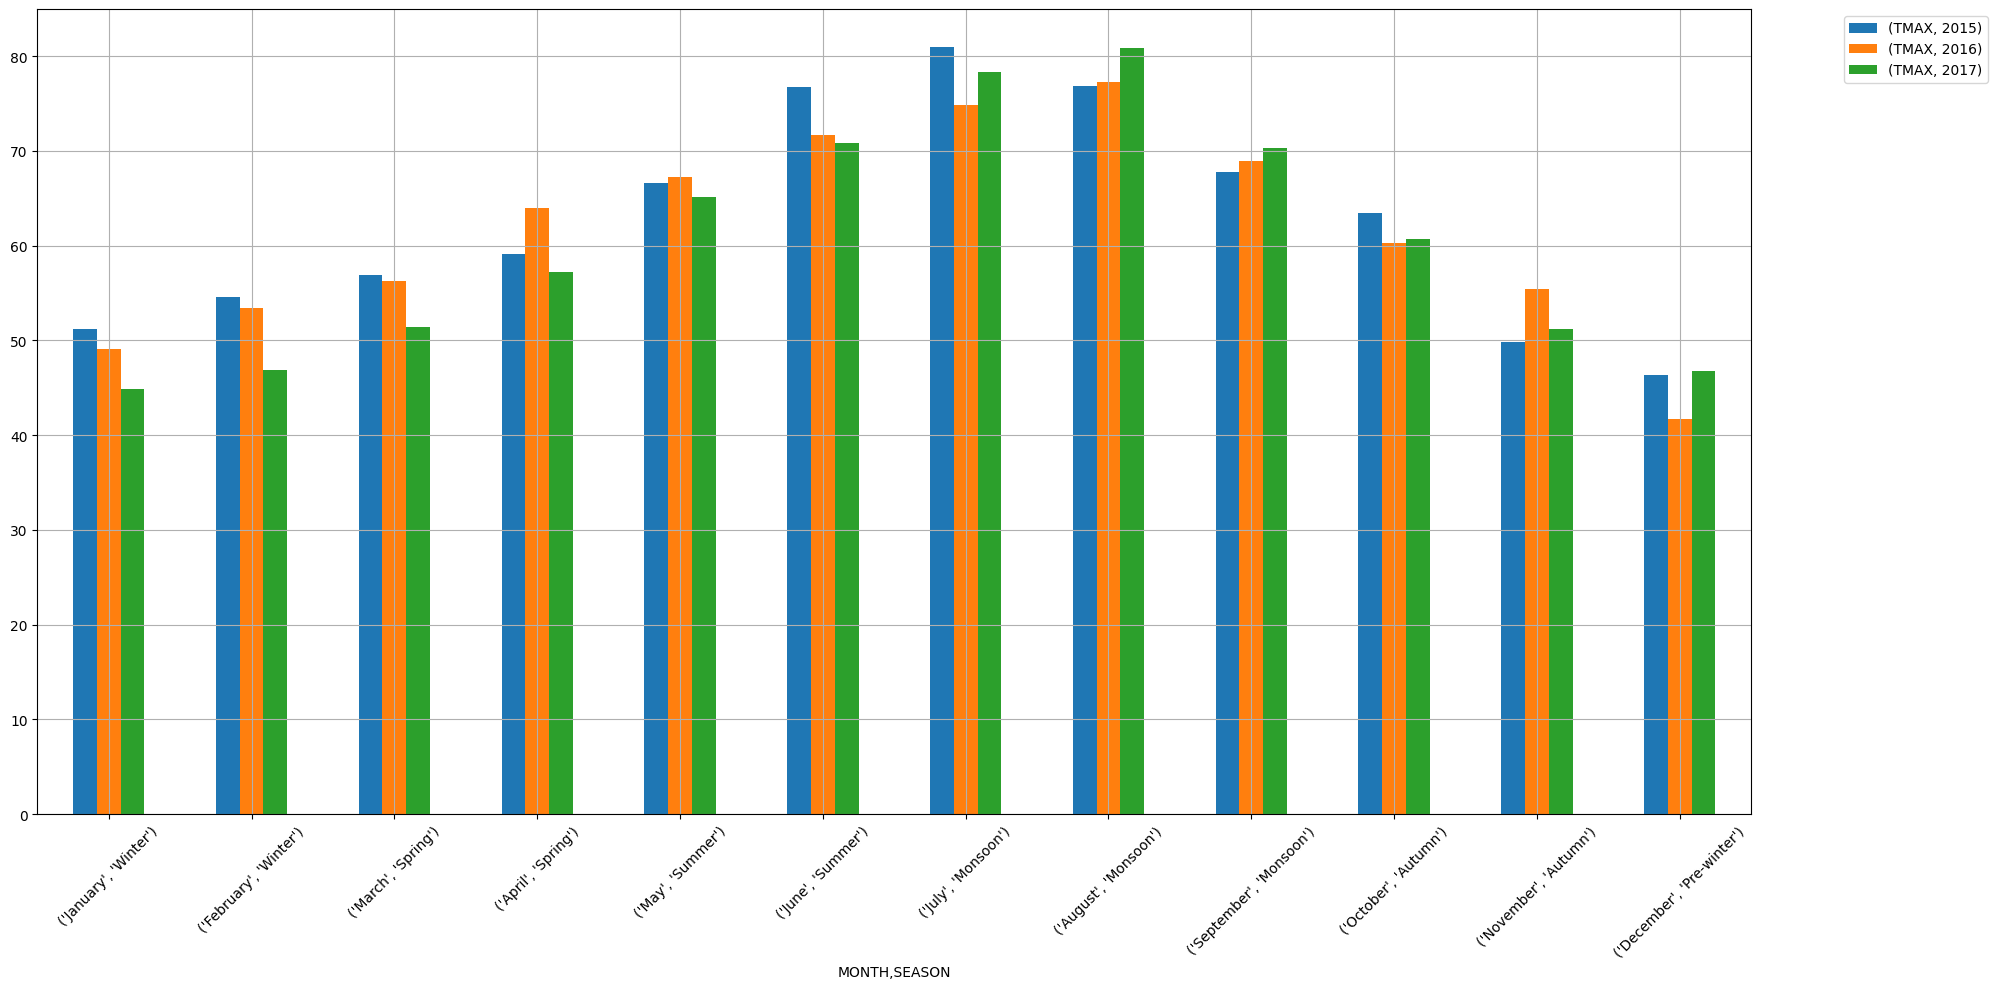

In [152]:
# Define the correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'MONTH' to categorical type with the specified order
year_gr['MONTH'] = pd.Categorical(year_gr['MONTH'], categories=month_order, ordered=True)

year_gr_pivot_Month = year_gr.pivot_table(index = ['MONTH','SEASON'],columns = ['YEAR'],values = ['TMAX'])

year_gr_pivot_Month.plot.bar(figsize = (20,10), grid = True)

tick = range(len(year_gr_pivot_Month))

plt.xticks(ticks = tick,labels = year_gr_pivot_Month.index,rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()